<a href="https://colab.research.google.com/github/ryuhyunwoo1/classDeepLearning/blob/main/practices/practices_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4

## Introduction to Keras and Tensorflow

### What's Tensorflow

Tensorflow is a python based, free, open source machine learning platform, developed by Google.


Run not only on CPUs, but also on GPUs and TPUs, parallel hardware accelerators.

Compute the gradient of any differentiable expression

**Tensor manipulation infrastructure**: tensors, variables, automatic differentiation, distribution...



### What's Keras

Keras is a deep learning API for python, built on top of TensorFlow Provides a convenient way to define and train deep learning model.

**Deep learning development**: layers, models, optimizers, losses, metrices...



### First steps with Tensorflow

In [1]:
# All-ones or all-zeros tensors
import tensorflow as tf
x = tf.ones(shape = (2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape = (2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
# Random tensors
x = tf.random.normal(shape = (3,1), mean = 0, stddev = 1)
print(x)

tf.Tensor(
[[-2.3782246 ]
 [ 0.62657624]
 [ 1.2161208 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape = (3, 1), minval = 0., maxval = 1. )
print(x)

tf.Tensor(
[[0.5743152]
 [0.8199525]
 [0.6777772]], shape=(3, 1), dtype=float32)


In [5]:
# Creating a TensorFlow variable
v = tf.Variable(initial_value = tf.random.normal (shape = (3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.7443025 ],
       [ 0.36956066],
       [-0.03631012]], dtype=float32)>


In [6]:
# Assigning a value to a Tensorflow variable
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [9]:
# Basic math operations
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [14]:
# Using GradientTape
input_var = tf.Variable(initial_value = 3)

with tf.GradientTape() as tape:
  result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

In [16]:
# Using GradientTape with constant tensor inputs
input_const = tf.constant(3)

with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)

gradient = tape.gradient(result, input_const)

#### Example

In [38]:
## Example: A linear classifier in pure TensorFlow
import numpy as np
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [ [1, 0.5], [0.5, 1] ],
    size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [ [1, 0.5], [0.5, 1] ],
    size = num_samples_per_class
)

In [39]:
inputs = np.vstack( (negative_samples, positive_samples) ).astype(np.float32)

In [40]:
targets = np.vstack( (np.zeros((num_samples_per_class, 1), dtype = "float32"),
                      np.ones((num_samples_per_class, 1), dtype = "float32")))

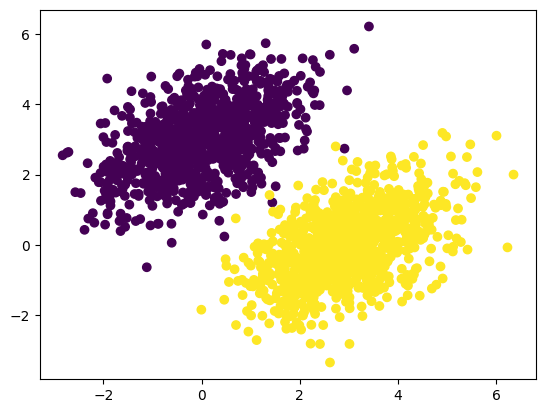

In [41]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0] )
plt.show()

In [42]:
# Create a linear classifier
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim, )))

# Forward pass function
def model(inputs):
  return tf.matmul(inputs, W) + b

# prediction = w1 * x + w2 * y + b

In [43]:
# Define our loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [44]:
# Training step using gradient decent
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [45]:
# the batch training loop
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"step {step}でのLOSS値: {loss:.4f}")

step 0でのLOSS値: 1.9135
step 1でのLOSS値: 0.3047
step 2でのLOSS値: 0.1386
step 3でのLOSS値: 0.1120
step 4でのLOSS値: 0.1026
step 5でのLOSS値: 0.0956
step 6でのLOSS値: 0.0895
step 7でのLOSS値: 0.0840
step 8でのLOSS値: 0.0789
step 9でのLOSS値: 0.0742
step 10でのLOSS値: 0.0700
step 11でのLOSS値: 0.0661
step 12でのLOSS値: 0.0626
step 13でのLOSS値: 0.0593
step 14でのLOSS値: 0.0564
step 15でのLOSS値: 0.0537
step 16でのLOSS値: 0.0512
step 17でのLOSS値: 0.0490
step 18でのLOSS値: 0.0469
step 19でのLOSS値: 0.0450
step 20でのLOSS値: 0.0433
step 21でのLOSS値: 0.0417
step 22でのLOSS値: 0.0403
step 23でのLOSS値: 0.0390
step 24でのLOSS値: 0.0378
step 25でのLOSS値: 0.0367
step 26でのLOSS値: 0.0357
step 27でのLOSS値: 0.0348
step 28でのLOSS値: 0.0339
step 29でのLOSS値: 0.0332
step 30でのLOSS値: 0.0325
step 31でのLOSS値: 0.0318
step 32でのLOSS値: 0.0313
step 33でのLOSS値: 0.0307
step 34でのLOSS値: 0.0302
step 35でのLOSS値: 0.0298
step 36でのLOSS値: 0.0294
step 37でのLOSS値: 0.0290
step 38でのLOSS値: 0.0287
step 39でのLOSS値: 0.0284


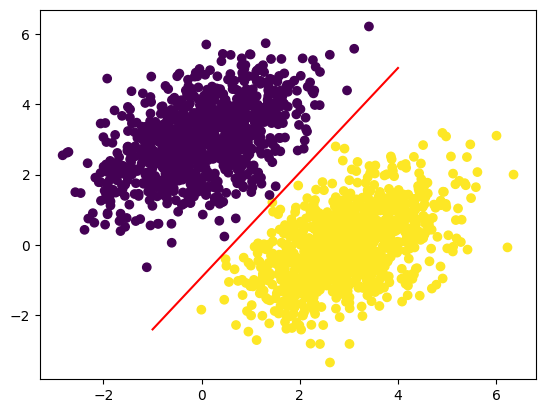

In [49]:
predictions = model(inputs)  <--　重要！！
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]

### Anatomy of a neural network: Keras API

In [56]:
# Layer class in Keras
from tensorflow import keras
class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [58]:
# once instantiated, a layer like this can be used just like a function
my_dense = SimpleDense(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

# layersを持ち出す他の方法。これが使いやすいそう
from tensorflow.keras import layers
layer = layers.Dense(32, activation = "relu")

(2, 32)


In [61]:
# Automatic shape inference
## layers didn't receive any information about the shape of their inputs. Instead, they automatically inferred their input shape
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential( [
    layers.Dense(32, activation = "relu"),
    layers.Dense(32)
])

In [62]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [64]:
# fit() method
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(
    inputs,
    targets,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
16/16 [==============================] - 2s 3ms/step - loss: 11.0201 - accuracy: 0.9980
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 10.6340 - accuracy: 0.9980
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 10.3059 - accuracy: 0.9980
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 9.9915 - accuracy: 0.9980
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 9.6809 - accuracy: 0.9980


In [67]:
# Monitoring loss and metrics on validation data
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

Epoch 1/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0834 - binary_accuracy: 0.9650 - val_loss: 0.0292 - val_binary_accuracy: 0.9933
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0741 - binary_accuracy: 0.9507 - val_loss: 0.0841 - val_binary_accuracy: 0.9783
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0728 - binary_accuracy: 0.9521 - val_loss: 0.0281 - val_binary_accuracy: 0.9950
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0685 - binary_accuracy: 0.9629 - val_loss: 0.1406 - val_binary_accuracy: 0.8717
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
[[ 0.12459776]
 [ 0.93882835]
 [ 0.8675407 ]
 [-0.32374024]
 [ 1.3489522 ]
 [ 0.732569  ]
 [ 0.8773937 ]
 [-0.11830384]
 [ 0.64870846]
 [ 0.67161465]]


## Getting start with Neural Network

**知っておきたい！**

For binary classification, we use **SIGMOID** with **single dense** output layer

If we use Dense layer with output 2, natural extension should be...

中間層のlayersは充分に大きくなければ、accuracyが暴落するかねないから注意を！！
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

### Classifying movie reviews : a BINARY classification example

**The IMDA dataset**:

50000 highly polarized reviews

25000 reviews for training and 25000 reviews for testing

Each set consisting of 50% negative and 50% positive reviews

In [69]:
# 1. データを準備します。

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [71]:
## レビューデータをテキスト形式に変換します。
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [74]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros( (len(sequences), dimension) )
  for i, sequence in enumerate(sequences):
    for j in sequence :
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [75]:
# 2. モデルを生成します。
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [76]:
# 3. モデルをコンパイルします。
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [77]:
# 4. 検証用データセットを作ります。
x_val = x_train[:10000]
partial_x_train = x_train[10000 :]
y_val = y_train[:10000]
partial_y_train = y_train[10000 :]

In [ ]:
# 5. モデルを学習します。
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

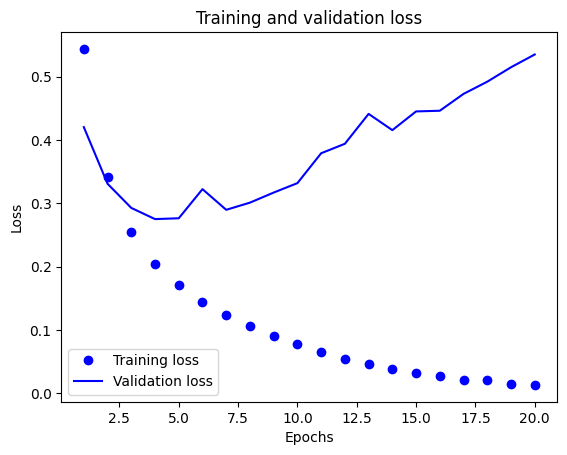

In [79]:
# 6. 学習と検証でのlossとaccuracyを確認する。
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

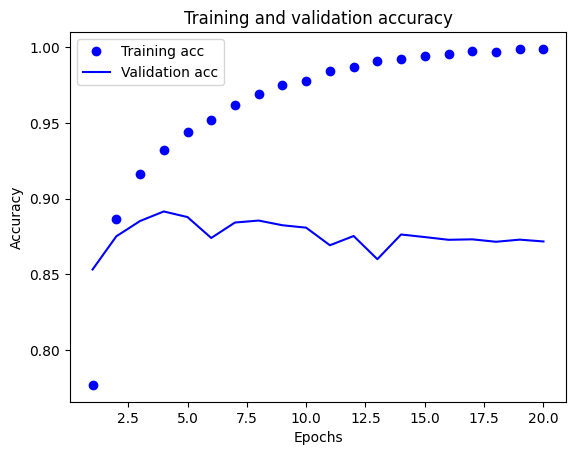

In [80]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 4番目以降、過適合overoptimizingが発生してしまった。

In [81]:
# 7. モデルを再度学習させる。(過適合が発生しないよう、4度目までepochsを適用)
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4581 - accuracy: 0.8207
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2735 - accuracy: 0.9039
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2153 - accuracy: 0.9222
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2879 - accuracy: 0.8845


In [82]:
results
## 0.88 is test accuracy, 0.29 is the test loss

[0.28787460923194885, 0.8845199942588806]

In [83]:
# 8. テストデータで予測
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.17718008],
       [0.9995586 ],
       [0.77355796],
       ...,
       [0.08231591],
       [0.05345107],
       [0.45309108]], dtype=float32)

### Classifying newswires : a MULTICLASS classification example

**The Reuters dataset**:

Dataset for text classification (46 different topics)

8982 training and 2246 test examples

In [ ]:
# 1. データを準備します。
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [87]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [90]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [91]:
# 2. モデルを生成します。
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

In [95]:
# 3. モデルをコンパイルします。
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [96]:
# 4. 検証用データセットを作ります。
x_val = x_train[:1000]
partial_x_train = x_train[1000 :]
y_val = y_train[:1000]
partial_y_train = y_train[1000 :]

In [ ]:
# 5. モデルを学習します。
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

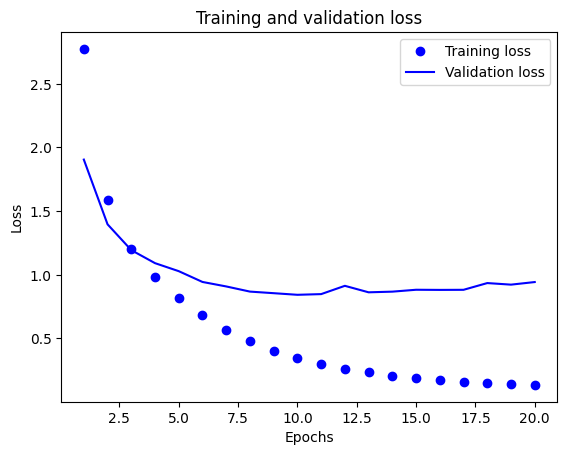

In [98]:
# 6. 学習と検証でのlossとaccuracyを確認する。
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

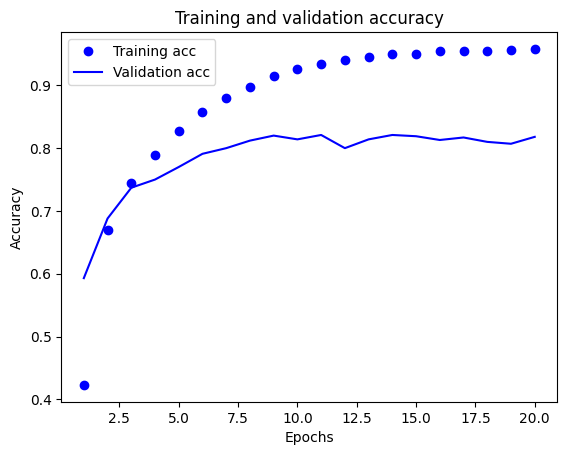

In [99]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 9番目以降、過適合overoptimizingが発生してしまった。

In [ ]:
# 7. モデルを再度学習させる。(過適合が発生しないよう、9度目までepochsを適用)
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

In [101]:
results

[0.9155378937721252, 0.792965292930603]

In [102]:
## ランダム推測、accuracyは約18.8％であるからまあまあいいかと言えるレベル。
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18833481745325023

In [106]:
## Generating predictions on new data
predictions = model.predict(x_test)
## Each entry in "predictions" is a vector of length 46.
predictions[0].shape
## The coefficients in this vector sum to 1, as the model use softmax.
np.sum(predictions[0])
## The largest entry is the predicted class:
np.argmax(predictions[0])

71/71 [==============================] - 0s 3ms/step


3

### Predicting house prices : a REGRESSION example